# Credit Card Fraud Detection

In [48]:
''' Linear Algebra'''
import pandas as pd
import numpy as np

''' Data visualization'''
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

''' Scikit-Learn'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix

''' Imbalanced Classes'''
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

''' Tensorflow Keras'''
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay



**The dataset: `Credit Card Transactions`**

For this open challenge, I will `work with data extracted from credit card transactions`. 

As this is `sensitive data`, only 3 columns are known out of a total 31: the rest have been transformed to `anonymize` them (in fact, they are `PCA projections of initial data`).

The 3 known columns are:

* `TIME`: the time elapsed between the transaction and the first transaction in the dataset
* `AMOUNT`: the amount of the transaction
* `CLASS` (our target): 
    * `0 : valid transaction` 
    * `1 : fraudulent transaction`

❓ **Dataset** ❓ Start by downloading the dataset:
* on the Kaggle website [here](https://www.kaggle.com/mlg-ulb/creditcardfraud) 

Load data to create `X` and `y`

In [49]:
# Load data
df = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [50]:
#select data
X = df.drop(columns = ['Class'])
y = df['Class']
X.head(), y.head()

(   Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V20       V21       V22       V23       V24  \
 0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
 1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
 2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
 3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
 4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   
 
         V25      

## 1. Rebalancing classes

In [51]:
# Let's check class balance
pd.Series(y).value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

☝️ in this `fraud detection` challenge, **the classes are extremely imbalanced**:
* 99.8 % of normal transactions
* 0.2 % of fraudulent transactions

**We won't be able to detect cases of fraud unless we apply some serious rebalancing strategies!**


In [52]:
# Train test and val split before any resampling to keep real test set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3)


In [53]:
print(f"X_train.shape = {X_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"X_val.shape = {X_val.shape}")
print(f"y_val.shape = {y_val.shape}")
print(f"X_test.shape = {X_test.shape}")
print(f"y_test.shape = {y_test.shape}")

X_train.shape = (139554, 30)
y_train.shape = (139554,)
X_val.shape = (59810, 30)
y_val.shape = (59810,)
X_test.shape = (85443, 30)
y_test.shape = (85443,)


In [54]:
# How many "fraud" samples do I have in each split?
print(np.sum(y_train[y_train == 1]))
print(np.sum(y_val[y_val == 1]))
print(np.sum(y_test[y_test == 1]))

print("-"*100)

print(f"There are {pd.Series(y_train).value_counts()[1]} fraudulent transactions in the train set")
print(f"There are {pd.Series(y_val).value_counts()[1]} fraudulent transactions in the val set")
print(f"There are {pd.Series(y_test).value_counts()[1]} fraudulent transactions in the test set")

227
110
155
----------------------------------------------------------------------------------------------------
There are 227 fraudulent transactions in the train set
There are 110 fraudulent transactions in the val set
There are 155 fraudulent transactions in the test set


In [55]:
# Sampling strategies
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.33)

In [56]:
from sklearn import set_config;  set_config(display = 'diagram')

# Pipelining the two strategies
steps =  [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
pipeline

Pipeline(steps=[('o', SMOTE(sampling_strategy=0.1)),
                ('u', RandomUnderSampler(sampling_strategy=0.33))])

In [61]:
# Rebalance the dataset
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

print(f"X_train_resampled.shape = {X_train_resampled.shape}")
print(f"y_train_resampled.shape = {y_train_resampled.shape}")

X_train_resampled.shape = (56150, 30)
y_train_resampled.shape = (56150,)


In [71]:
y_train_resampled.array

<PandasArray>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 ...
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Length: 56150, dtype: int64

In [72]:
# Reshuffle the resampled data just to be sure
stacked_resampled_data = np.hstack([X_train_resampled, y_train_resampled.array.reshape(-1,1)])
np.random.shuffle(stacked_resampled_data)

X_train_resampled = stacked_resampled_data[:,:30]
y_train_resampled = stacked_resampled_data[:,-1]


In [73]:
X_train_resampled.shape, y_train_resampled.shape, stacked_resampled_data.shape

((56150, 30), (56150,), (56150, 31))

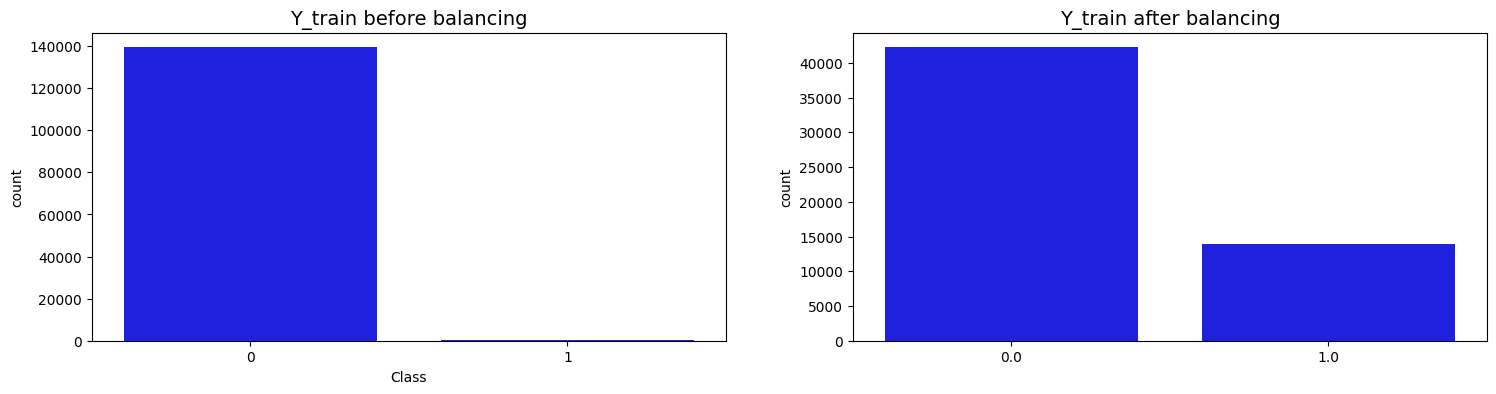

In [74]:
# plotting
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(1, 2, figsize=(18,4))

''' Before rebalancing classes'''

sns.countplot(y_train, ax=ax[0], color='b')
ax[0].set_title('Y_train before balancing', fontsize=14)

''' After rebalancing classes'''

sns.countplot(y_train_resampled, ax=ax[1], color='b')
ax[1].set_title('Y_train after balancing', fontsize=14);

## 2. Neural Network iterations

 Try to fit a neural network to optimize the test score



In [75]:
metrics = [
    keras.metrics.Recall(name='recall'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.AUC(name='prc', curve='PR'),  # precision-recall curve
]

2024-04-24 00:08:39.107325: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-24 00:08:39.118145: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-24 00:08:39.121526: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-VB5M6H7): /proc/driver/nvidia/version does not exist
2024-04-24 00:08:39.165748: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [115]:
from tensorflow.keras.layers import Normalization
from tensorflow.keras.metrics import Recall, Precision

def init_model():
    input_shape = X_train_resampled.shape[1:]
    normalizer = Normalization()
    normalizer.adapt(X_train_resampled)

    model = models.Sequential()
    model.add(normalizer)
    model.add(layers.Dense(32,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    #model.add(layers.Dense(16, activation='relu'))
    #model.add(layers.Dropout(0.3))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation = 'sigmoid'))

    # Model compilation
    optimizer = Adam(lr=0.0001)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=metrics)
    return model


# Reqularized model

In [116]:
model = init_model()


In [117]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 30)               61        
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 32)                992       
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                 264       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                      

In [118]:
es = EarlyStopping(
    patience = 10,
    monitor = 'val_recall',
    restore_best_weights = True
)

history = model.fit(
    X_train_resampled,
    y_train_resampled,
    validation_data = (X_val, y_val),
    epochs = 500,
    batch_size = 64,
    callbacks = [es],
    shuffle = True,

)

Epoch 1/500
878/878 [==============================] - 7s 7ms/step - loss: 0.4602 - recall: 0.6871 - precision: 0.6026 - prc: 0.7239 - val_loss: 0.1641 - val_recall: 0.7818 - val_precision: 0.7544 - val_prc: 0.6586
Epoch 2/500
878/878 [==============================] - 5s 6ms/step - loss: 0.2226 - recall: 0.7834 - precision: 0.9481 - prc: 0.9306 - val_loss: 0.0482 - val_recall: 0.7909 - val_precision: 0.7565 - val_prc: 0.6737
Epoch 3/500
878/878 [==============================] - 5s 6ms/step - loss: 0.1538 - recall: 0.8422 - precision: 0.9774 - prc: 0.9564 - val_loss: 0.0253 - val_recall: 0.8091 - val_precision: 0.6181 - val_prc: 0.6884
Epoch 4/500
878/878 [==============================] - 5s 5ms/step - loss: 0.1250 - recall: 0.8678 - precision: 0.9830 - prc: 0.9660 - val_loss: 0.0213 - val_recall: 0.8364 - val_precision: 0.5227 - val_prc: 0.7053
Epoch 5/500
878/878 [==============================] - 5s 6ms/step - loss: 0.1068 - recall: 0.8847 - precision: 0.9825 - prc: 0.9734 - val_l

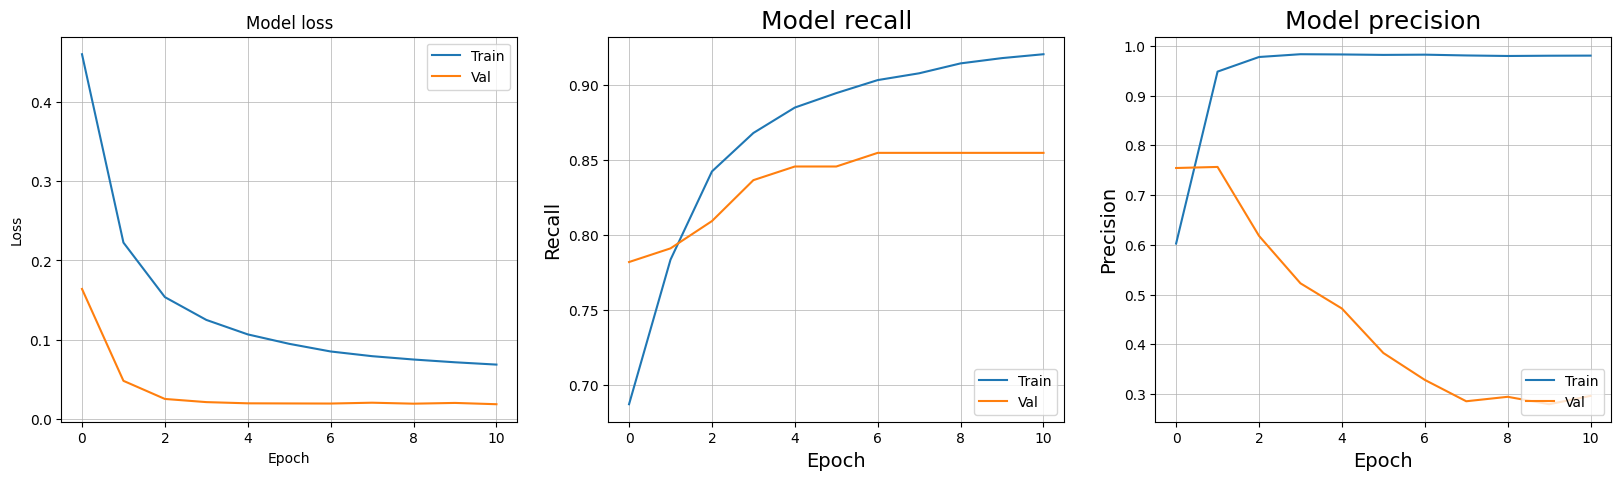

In [119]:
def plot_loss_precision_recall_curve(history):

    fig, ax =plt.subplots(1,3,figsize=(20,5))

    # --- LOSS

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend(['Train', 'Val'], loc='upper right')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- RECALL

    ax[1].plot(history.history['recall'])
    ax[1].plot(history.history['val_recall'])
    ax[1].set_title('Model recall', fontsize = 18)
    ax[1].set_xlabel('Epoch', fontsize = 14)
    ax[1].set_ylabel('Recall', fontsize = 14)
    ax[1].legend(['Train', 'Val'], loc='lower right')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)


    # --- PRECISION


    ax[2].plot(history.history['precision'])
    ax[2].plot(history.history['val_precision'])
    ax[2].set_title('Model precision', fontsize = 18)
    ax[2].set_xlabel('Epoch', fontsize = 14)
    ax[2].set_ylabel('Precision', fontsize = 14)
    ax[2].legend(['Train', 'Val'], loc='lower right')
    ax[2].grid(axis="x",linewidth=0.5)
    ax[2].grid(axis="y",linewidth=0.5)

    plt.show()

plot_loss_precision_recall_curve(history)

## 3. Score the model on the unseen Test set

In [120]:
model.evaluate(
    X_test,
    y_test,
    verbose = 0,
    return_dict= True
    )

{'loss': 0.16372258961200714,
 'recall': 0.7677419185638428,
 'precision': 0.8380281925201416,
 'prc': 0.7016648650169373}

In [121]:
y_pred_proba = model.predict(X_test)

2671/2671 [==============================] - 9s 3ms/step


In [122]:
threshold = 0.50

y_pred_binary = np.where(y_pred_proba > threshold, 1, 0 )

### Confusion Matrix

In [123]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred_binary)
cm

array([[85265,    23],
       [   36,   119]])

Text(0.5, 25.722222222222214, 'Predicted label')

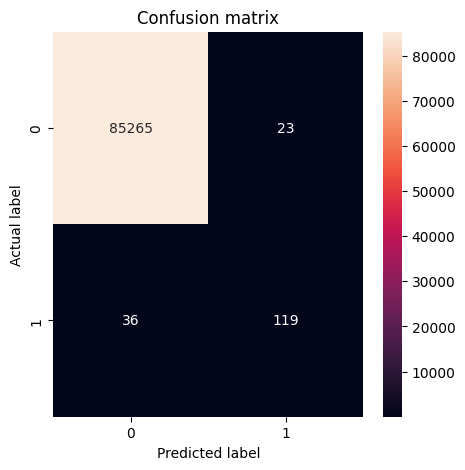

In [124]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85288
           1       0.84      0.77      0.80       155

    accuracy                           1.00     85443
   macro avg       0.92      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [126]:
from sklearn.metrics import precision_recall_curve

def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = precision_recall_curve(labels, predictions)
    plt.plot(recall, precision, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

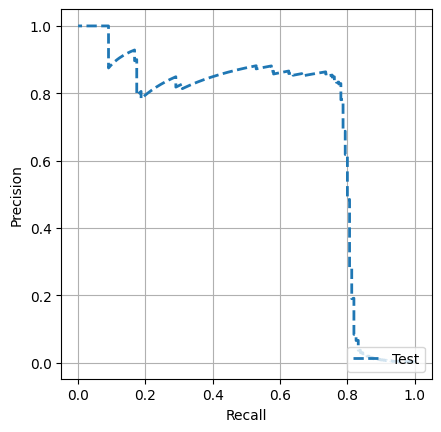

In [127]:
plot_prc("Test", y_test, y_pred_proba, linestyle='--')
plt.legend(loc='lower right')